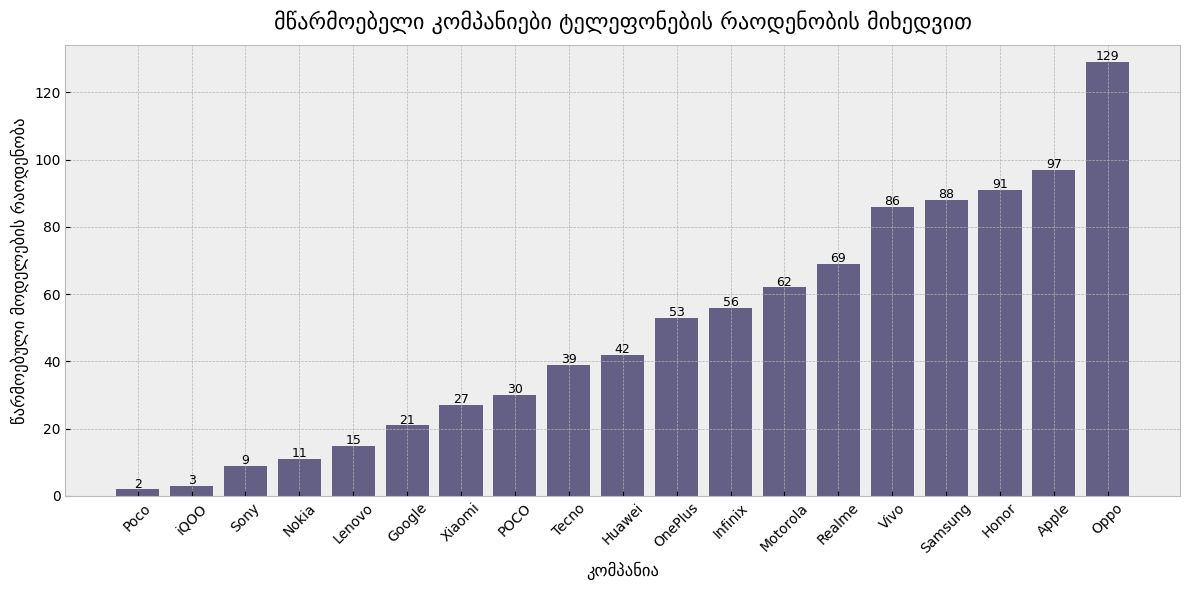

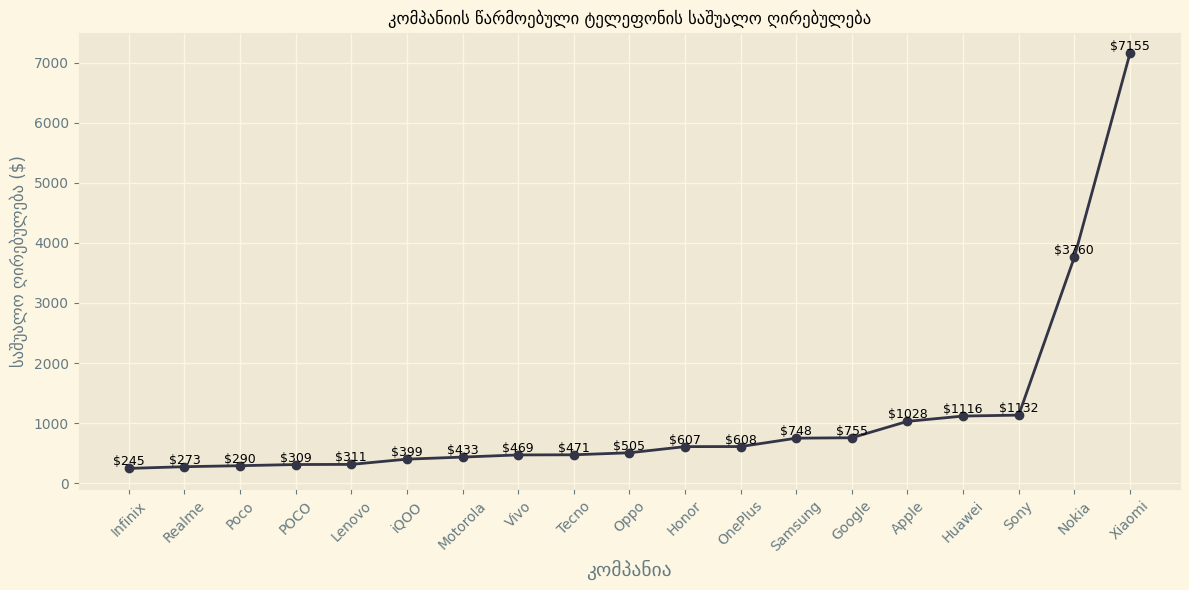

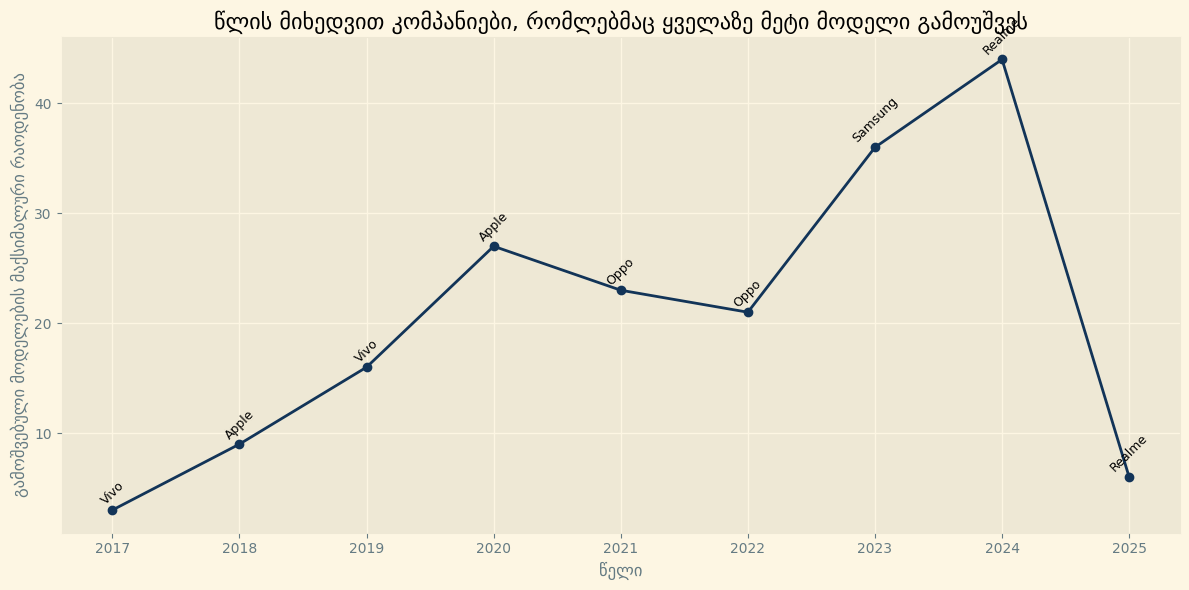


📱 ტელეფონები რომელთა ღირებულებაც აჭარბებს 1000$-ს:

მწარმოებელი კომპანია: Apple, მოდელი: iPhone 16 Pro 256GB, ღირებულება: 1049$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 16 Pro 512GB, ღირებულება: 1099$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 16 Pro Max 128GB, ღირებულება: 1099$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 16 Pro Max 256GB, ღირებულება: 1199$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 16 Pro Max 512GB, ღირებულება: 1299$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Plus 512GB, ღირებულება: 1049$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Pro 128GB, ღირებულება: 1099$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Pro 256GB, ღირებულება: 1199$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Pro 512GB, ღირებულება: 1299$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Pro Max 128GB, ღირებულება: 1199$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Pro Max 256GB, ღირებულება: 1299$
მწარმოებელი კომპანია: Apple, მოდელი: iPhone 15 Pro Max 512GB, ღირებულება: 1399$
მწარმოებელ

მწარმოებელი კომპანია:  Apple
მოდელი:  iPhone 16e
წონა (გრამებში):  167
ბატარეა (მილიამპერ-საათებში):  4005
ეკრანის ზომა (ინჩებში):  6.1
ღირებულება ($):  517
გამოშვების წელი:  2025


ტელეფონი წარმატებით დაემატა!


შეიყვანეთ მწარმოებელი კომპანიის სახელი:  Apple
შეიყვანეთ მობილური ტელეფონის მოდელის სახელი:  iPhone 16e
შეიყვანეთ ახალი ღირებულება ($):  518


ღირებულება წარმატებით განახლდა!


შეიყვანე კომპანიის სახელი წასაშლელად:  Xiaomi


27 ჩანაწერი წარმატებით წაიშალა!


In [1]:
import sqlite3
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

conn = sqlite3.connect('PHONES.db')
c = conn.cursor()

#დიაგრამა ნომერი ერთი - მწარმოებელი კომპანიები გამოშვებული ტელეფონების რაოდენობის მიხედვით.

plt.style.use('bmh')
c.execute("SELECT company, COUNT(*) FROM mobiles GROUP BY company ORDER BY COUNT(*) ASC")
data = c.fetchall()

companies = [row[0] for row in data]
counts = [row[1] for row in data]
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(companies, counts, color='#090040', alpha=0.6)

ax.set_title("მწარმოებელი კომპანიები ტელეფონების რაოდენობის მიხედვით", fontsize=16, pad=12)
ax.set_xlabel("კომპანია")
ax.set_ylabel("წარმოებული მოდელების რაოდენობა")
ax.set_ylim(0, max(counts) + 5)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(yval), ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#დიაგრამა ნომერი ორი - კომპანიების მიერ წარმოებული ტელეფონების საშუალო ღირებულება.

c.execute("SELECT company, AVG(price) FROM mobiles GROUP BY company ORDER BY AVG(price) ASC")
data = c.fetchall()

companies = [row[0] for row in data]
avg_prices = [round(row[1], 2) for row in data]
x = np.arange(len(companies))

with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(12, 6))
    plt.plot(x, avg_prices, marker='o', linestyle='-', linewidth=2, color='#333446')

    for i, value in enumerate(avg_prices):
        plt.text(x[i], value + 50, f"${int(value)}", ha='center', fontsize=9)

    plt.title("კომპანიის წარმოებული ტელეფონის საშუალო ღირებულება", fontsize=12)
    plt.xlabel("კომპანია", fontsize=14)
    plt.ylabel("საშუალო ღირებულება ($)", fontsize=12)
    plt.xticks(x, companies, rotation=45)
    plt.tight_layout()
    plt.show()

#დიაგრამა ნომერი სამი - თითოეულ წელს ყველაზე მეტი მოდელის გამომშვები კომპანია.

c.execute("""SELECT year, company, COUNT(*) as model_count FROM mobiles WHERE year BETWEEN 2017 AND 2025 GROUP BY year, company""")
data = c.fetchall()

year_company_counts = defaultdict(list)
for year, company, count in data:
    year_company_counts[year].append((company, count))

years = sorted(year_company_counts.keys())
max_counts = []
max_companies = []

for year in years:
    companies_counts = year_company_counts[year]
    max_count = max(count for _, count in companies_counts)
    companies_with_max = [company for company, count in companies_counts if count == max_count]
    max_counts.append(max_count)
    max_companies.append(companies_with_max)
x = np.arange(len(years))

plt.style.use('Solarize_Light2')
plt.figure(figsize=(12, 6))
plt.plot(x, max_counts, marker='o', linestyle='-', color='#123458', linewidth=2)

for i, comps in enumerate(max_companies):
    label = ", ".join(comps)
    plt.text(x[i], max_counts[i] + 0.5, label, ha='center', fontsize=9, rotation=45)

plt.xticks(x, years)
plt.xlabel("წელი")
plt.ylabel("გამოშვებული მოდელების მაქსიმალური რაოდენობა")
plt.title("წლის მიხედვით კომპანიები, რომლებმაც ყველაზე მეტი მოდელი გამოუშვეს")
plt.tight_layout()
plt.show()

#ბაზაზე სამუშაოდ ფასის გასუფთავება სიმბოლოებისგან რომ მხოლოდ ციფრები დარჩენილიყო.

c.execute("SELECT rowid, price FROM mobiles")
rows = c.fetchall()

for row in rows:
    rowid = row[0]
    price_str = row[1]

    if price_str is not None:
        clean_price = re.sub(r'[^\d]', '', str(price_str))
        c.execute("UPDATE mobiles SET price = ? WHERE rowid = ?", (clean_price, rowid))
conn.commit()

# WHERE ოპერაციის გამოყენება რომ ამოკრიბოს 1000 დოლარზე მეტი ღირებულების მქონე ტელეფონები.

c.execute("SELECT company, model, price FROM mobiles WHERE CAST(price AS INTEGER) > 1000")
results = c.fetchall()

print("\n📱 ტელეფონები რომელთა ღირებულებაც აჭარბებს 1000$-ს:\n")
for row in results:
    print(f"მწარმოებელი კომპანია: {row[0]}, მოდელი: {row[1]}, ღირებულება: {row[2]}$")

#მომხმარებლის მიერ ახალი ტელეფონის დამატება ყველა არსებული მონაცემის გათვალისწინებით.

company = input("მწარმოებელი კომპანია: ")
model = input("მოდელი: ")
weight = input("წონა (გრამებში): ") + "g"
battery = input("ბატარეა (მილიამპერ-საათებში): ") + "mAh"
screen = input("ეკრანის ზომა (ინჩებში): ") + " inches"
price = int(input("ღირებულება ($): "))
year = int(input("გამოშვების წელი: "))

try:
    c.execute("""INSERT INTO mobiles (company, model, weight, battery, screen, price, year)
        VALUES (?, ?, ?, ?, ?, ?, ?)""", (company, model, weight, battery, screen, price, year))
    conn.commit()

    print("ტელეფონი წარმატებით დაემატა!")
except Exception as o:
    print("ტელეფონის დამატებისას შეცდომა წარმოიშვა!", o)

#მომხმარებლის მიერ ღირებულების განახლება კონკრეტული (უკვე არსებული) მოდელისთვის.

company = input("შეიყვანეთ მწარმოებელი კომპანიის სახელი: ")
model = input("შეიყვანეთ მობილური ტელეფონის მოდელის სახელი: ")
new_price = float(input("შეიყვანეთ ახალი ღირებულება ($): "))

c.execute("""UPDATE mobiles SET price = ? WHERE company = ? AND model = ?""", (new_price, company, model))
conn.commit()

if c.rowcount == 0:
    print("ამგვარი ტელეფონი ვერ მოიძებნა.")
else:
    print("ღირებულება წარმატებით განახლდა!")

# კონკრეტული კომპანიის ყველა მოდელის წაშლა მომხმარებლის სურვილისამებრ.

company = input("შეიყვანე კომპანიის სახელი წასაშლელად: ")
c.execute("DELETE FROM mobiles WHERE company = ?", (company,))

if c.rowcount == 0:
    print("ამგვარი კომპანია ვერ მოიძებნა ბაზაში.")
else:
    print(f"{c.rowcount} ჩანაწერი წარმატებით წაიშალა!")

conn.commit()
conn.close()